Accuracy: 0.8625
Confusion Matrix:
[[50  2]
 [ 9 19]]


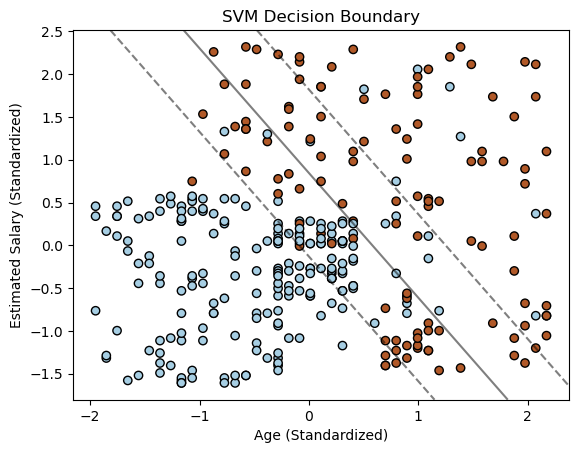

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the Social_Network_Ads dataset

df = pd.read_csv('Social_Network_Ads.csv')

# Assume the 'Age' and 'EstimatedSalary' as features and 'Purchased' as the target variable
X = df[['Age', 'EstimatedSalary']].values
y = df['Purchased'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Train a Support Vector Machine classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train_std, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test_std)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the decision boundary (works only for 2D feature spaces)
if X_train_std.shape[1] == 2:
    plt.scatter(X_train_std[:, 0], X_train_std[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolors='k', marker='o')

    # Plot the decision boundary
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
    Z = svm_classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])

    # Plot decision boundary and margins
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    plt.title("SVM Decision Boundary")
    plt.xlabel("Age (Standardized)")
    plt.ylabel("Estimated Salary (Standardized)")

    plt.show()
